In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [3]:
# prep for double exponential fits
def single_exp(x, a, b):
    return a * np.exp(b * x)
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [4]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust for each system to make ns.
taus = np.arange(1,np.argmax(average)+1)/10

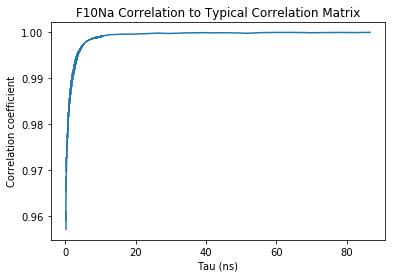

In [5]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('F10Na Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('F10Na_max_correlation_to_equaltime.png')

Bars are standard error

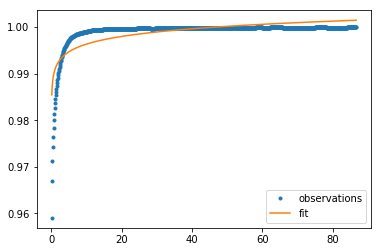

In [6]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.00237085*log(x) + 0.990895
yhat = 0.00237085*np.log(taus) + 0.990895
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_F10Na_prop_max_correlation_to_equaltime.png')

$$y = 0.00237085*log(x) + 0.990895$$

[ -3.42944795e-02  -6.63082314e-01   9.99259301e-01   9.99078945e-06]


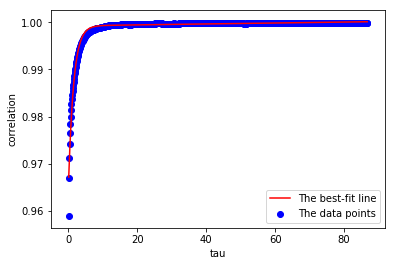

In [12]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(-.045,-.63,.1,.00000085),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_F10Na_prop_max_correlation_to_equaltime.png')

$$y = -3.42944795\times10^{-2} e^{-6.63082311\times10^{-1}x} + 9.99259301\times10^{-1} e^{9.99078945\times10^{-6}x}$$

[ -3.44256371e-02  -7.12728534e-01  -9.14183919e+00   9.37509314e-04
   1.01404695e+01   8.49629755e-04]


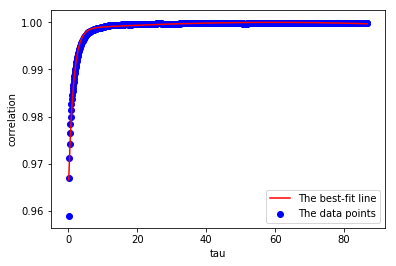

In [13]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-.045,-.63,.1,.00000085,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_F10Na_prop_max_correlation_to_equaltime.png')

$$y = -3.44256371\times10^{-2} e^{-7.12728534\times10^{-1}x} + -9.14183919 e^{9.37509314\times10^{-4}x} + 1.01404695\times10^{1} e^{8.49629755\times10^{-4}}$$

# Time lagged

In [14]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

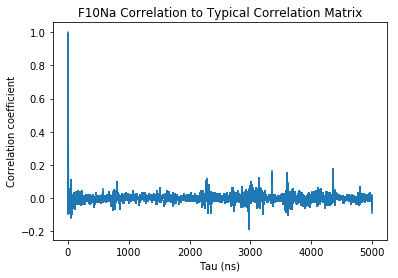

In [15]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('F10Na Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('F10Na_TL_correlation_to_equaltime.png')

This is actually hitting 0 and negatives, so an exponential or log fit ends up with NaNs.